# Stock Price Dynamics

Modeling stock price dynamics is an important aspect of mathematical finance. Simulating stock price movements allows an algorithmic trader to test different strategies. Policy makers at the federal reserve can evaluate risk and volatility using similar models.

It's important to keep in mind that every financial model contains assumptions and limitations. Understanding these limitations is a crucial part of being a responsible practicioner. At any rate, stochastic models are still a valuable tool for assessing risk and volatility.

## Geometric Brownian Motion

Simulations of stocks and options are often modeled using stochastic differential equations (SDEs). Because of the randomness associated with stock price movements, the models cannot be developed using ordinary differential equations (ODEs).

The usual model for the time-evolution of an asset price $S$ is given by the Geometric Brownian Motion, represented by the following stochastic differential equation:

$$dS = \mu S dt + \sigma S dW_t$$

where $S$ is the stock price, $\mu$ is the drift coefficient, $\sigma$ is the diffusion coefficient (or volatility), and $W_t$ is the [Brownian Motion](https://en.wikipedia.org/wiki/Brownian_motion).

In modeling a stock price, the drift coefficient represents the mean of returns over some period of time, and the diffusion coefficient represents the standard deviation of those same returns.

The Brownian Motion $W_t$ is the random portion of the equation. Each Brownian Increment $W_i$ is computed by multiplying a standard random variable $z_i$ from a normal distribution $N(0,1)$ with mean $0$ and standard deviation $1$ by the square root of the time increment $\sqrt{\Delta t_i}$.

$$W_i = z_i \sqrt{\Delta t_i}$$

The cumulative sum of the Brownian increments is the discretized Brownian path.

$$W_{n}(t) = \sum_{i = 1}^n W_{i}(t)$$

For the SDE above with an initial condition for the stock price of $S(0) = S_0$, the closed-form solution [Geometric Brownian Motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion) (GBM) is:

$$S(t) = S_0 e^{(\mu - \frac{1}{2}\sigma^2)t+\sigma W_t}$$

The solution $S(t)$ can be found by the application of [Ito's Lemma](https://www.quantstart.com/articles/Geometric-Brownian-Motion) to the stochastic differential equation.

## Euler-Maruyama Approximation

The example in the previous section is a simple case where there's actually a closed-form solution. The following SDE used for interest-rate models, which is known as the Langevin Equation, does not have a closed-form solution:

$$dS = -\mu S dt + \sigma dW_t$$

In this case, we need to use a numerical technique to approximate the solution. One of the most straightforward approximations is the [Euler-Maruyama Method](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method).

$$w_{i+1} = w_i - \mu w_i \Delta t_i + \sigma \Delta W_i$$

where $\mu$ and $\sigma$ are the drift and diffusion coefficients, respectively. Following a similar format, here's the Euler-Maruyama approximation for the SDE from the previous section:

$$w_{i+1} = w_i + \mu w_i \Delta t_i + \sigma w_i \Delta W_i$$

We will use this approximation as a verification of our model because we know what the closed-form solution is. It's always good practice to verify a numerical approximation against a simplified model with a known solution before applying it to more complex models. If the results agree well with the closed-form solution, we are probably solving the mathematical model correctly.

## Brownian Motion in Python

Before we can model the closed-form solution of GBM, we need to model the Brownian Motion. This is the stochastic portion of the equation. To do this we'll need to generate the standard random variables from the normal distribution $N(0, 1)$. Next, we'll multiply the random variables by the square root of the time step. The final step is to compute a cumulative sum to generate the Brownian Motion.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Brownian(T, N):
    dt = T/float(N)                                  # Time step
    b  = np.random.normal(0, 1, N) * np.sqrt(dt)     # Brownian increments
    W  = np.cumsum(b)                                # Brownian path
    W  = np.insert(W, 0, 0)                          # W_0 = 0 for Brownian motion
    return W, b

T = 1.       # Time period
N = 2**6     # No. of increments

W, b = Brownian(T, N)

If we plot the Brownian increments, we can see that the numbers oscillate as white noise, while the plot of the Brownian Motion shows a path that looks similar to the movement of a stock price.

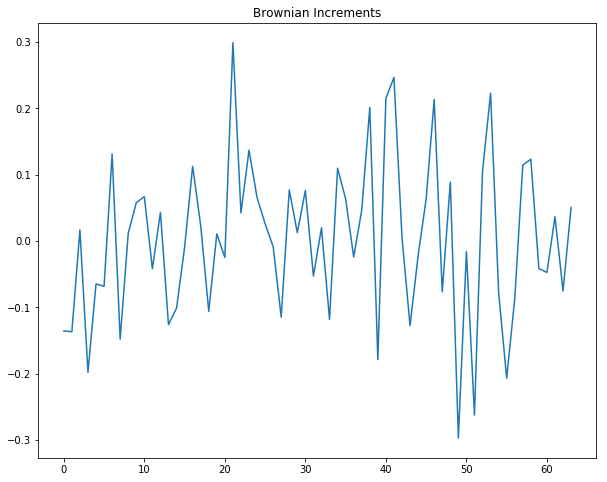

In [2]:
# Brownian increments
plt.figure(figsize = (10, 8))
xb = np.arange(len(b))
plt.plot(xb, b)
plt.title('Brownian Increments')
plt.show()

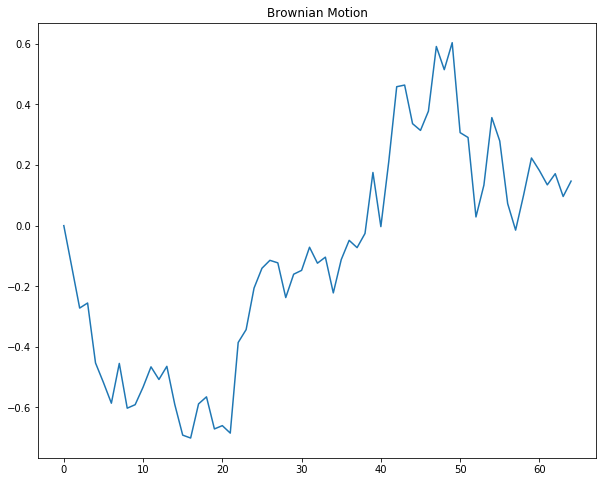

In [3]:
# Brownian motion
plt.figure(figsize = (10, 8))
xw = np.arange(len(W))
plt.plot(xw, W)
plt.title('Brownian Motion')
plt.show()

## GBM in Python

Now that we have a model of the Brownian Motion, we can put the pieces together by modeling the closed-form solution of GBM:

$$S(t) = S_0 e^{(\mu - \frac{1}{2}\sigma^2)t + \sigma W_t}$$

We'll start by making up some arbitrary returns and volatility, then we'll use some actual stock returns to build a real model.

Let's assume that the returns $\mu$ are $0.15$, and the volatility $\sigma$ is $0.4$. We'll start with an initial stock price $S_0$ of $55.25$. Putting all of the pieces together, here's what the code looks like in Python:

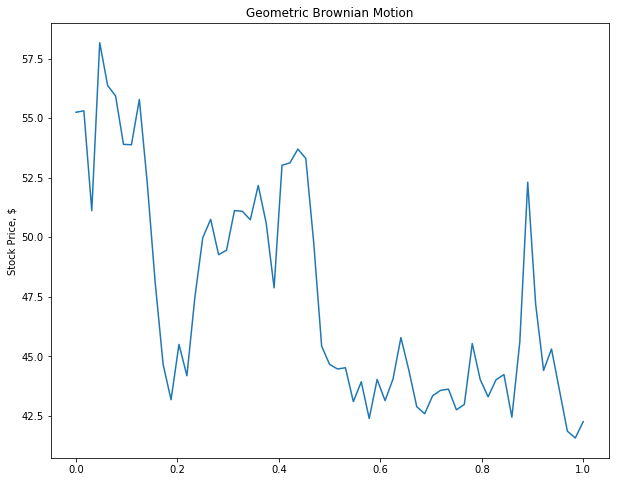

In [4]:
# GBM Exact Solution

# Parameters
#
# So:     initial stock price
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments

def GBM(So, mu, sigma, W, T, N):
    t = np.linspace(0., T, N+1)
    S = [So]
    for i in range(1, N+1):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So * np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

So = 55.25
mu = 0.15
sigma = 0.4
T = 1.
N = 2**6
W = Brownian(T, N)[0]

S, t = GBM(So, mu, sigma, W, T, N)

plt.figure(figsize = (10, 8))
plt.plot(t, S)
plt.ylabel('Stock Price, $')
plt.title('Geometric Brownian Motion')
plt.show()